
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# TP 4

#### Ejercicio 4




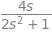

In [7]:
from sympy import *
init_printing(use_unicode=True)
s = symbols('s')
Z1=2*s
Z2=1/s
Z3=3*s
Z4=2*s
Z5=1/s

Za=(Z1*Z2)/(Z1+Z2+Z3)
Zb=(Z2*Z3)/(Z1+Z2+Z3)
Zc=(Z1*Z3)/(Z1+Z2+Z3)

Zp1=Zc+Z4
Zp2=Zb+Z5
Zt=Za+((Zp1*Zp2)/(Zp1+Zp2))
simplify(Zt)


#### Ejercicio 5
Dado el siguiente cuadripolo cargado con R  y cumpliendo con la condición de diseño $ZA.ZB = R^2$ La red se conoce como Red de Resistencia constante. 
Aplique MAI para obtener  $\frac{V_2}{V_1}$ y $Z_{in}$



Numeramos a los nodos:

<img src="./Circuito4.png" align="center" width="400" /> 

Nombramos a los nodos:

<img src="./nodos.png" align="center" width="400" /> 


MAI:

$\begin{bmatrix}
G+Y_A & -G  & -Y_A & 0\\
-G & 2G+Y_B & -G & -Y_B \\
-Y_A & -G & 2G+Y_A & -G\\
0 & -YB & -G & G+Y_B \\
\end{bmatrix}$

$\frac{V_0}{V_1}=\frac{V_{34}}{V_{14}}=sgn(3-4)sgn(1-4)\frac{Y^{34}_{14}}{Y^{14}_{14}}$

$\frac{V_0}{V_1}=\frac{
\begin{bmatrix}
-G & 2G+Y_B &\\
-Y_A & -G &
\end{bmatrix}
}{
\begin{bmatrix}
 2G+Y_B & -G \\
-G & 2G+Y_A\\
\end{bmatrix}
}=\frac{G^2+Y_A(2G+Y_B)}{(2G+Y_B)(2G+Y_A)-G^2}=\frac{G^2+2Y_AG+Y_AY_B}{4G^2+2GY_A+2GY_B+Y_AY_B-G^2}$

Reemplazando que:

$Y_AY_B=G^2$

$\frac{V_0}{V_1}=\frac{G^2+2Y_AG+G^2}{4G^2+2GY_A+2GY_B+G^2-G^2}$

$\frac{V_0}{V_1}=\frac{2G^2+2Y_AG}{4G^2+2GY_A+2GY_B}$

$\frac{V_0}{V_1}=\frac{G+Y_A}{2G+Y_A+Y_B}$

$Z_{in}=\frac{V_{14}}{I_{14}}=sgn(1-4)sgn(1-4)\frac{Y^{14}_{14}}{Y^{4}_{4}}$

$Z_{in}=\frac{
\begin{bmatrix}
 2G+Y_B & -G \\
-G & 2G+Y_A\\
\end{bmatrix}
}{
\begin{bmatrix}
G+Y_A & -G  & -Y_A \\
-G & 2G+Y_B & -G  \\
-Y_A & -G & 2G+Y_A \\
\end{bmatrix}
}=\frac{4G^2+2GY_A+2GY_B+Y_AY_B-G^2}{[(G+Y_A)(2G+Y_B)(2G+Y_A)-G^2Y_A-G^2Y_A]-[Y_A^2(2G+Y_B)-G^2(G+Y_A)-G^2(2G+Y_A)]}$


$Z_{in}=\frac{4G^2+2GY_A+2GY_B}{[(G+Y_A)(2G+Y_B)(2G+Y_A)-2G^2Y_A]-[Y_A^2(2G+Y_B)-G^2(G+Y_A)-G^2(2G+Y_A)]}$

Vamos al codigo para simplificar los calculos...

In [141]:
from sympy import *
init_printing(use_unicode=True)
G, YA,YB = symbols('G YA YB')

## Calculo de la Transferencia de tensión

In [142]:
Y14=Matrix([[2*G+YB, -G], [-G, 2*G+YA]])
Y14

⎡2⋅G + YB     -G   ⎤
⎢                  ⎥
⎣   -G     2⋅G + YA⎦

In [143]:
Y14.det()

In [144]:
Y4=Matrix([[G+YA, -G,-YA], [-G, 2*G+YB,-G], [-YA, -G,2*G+YA]])
Y4

⎡G + YA     -G       -YA   ⎤
⎢                          ⎥
⎢  -G    2⋅G + YB     -G   ⎥
⎢                          ⎥
⎣ -YA       -G     2⋅G + YA⎦

In [145]:
Y34=Matrix([[-G,2*G+YB], [-YA,-G]])
Y34

⎡-G   2⋅G + YB⎤
⎢             ⎥
⎣-YA     -G   ⎦

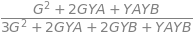

In [146]:
T=Y34.det()/Y14.det()
simplify(T)

In [147]:
T=simplify(T.subs(YA*YB,G*G))
T

In [148]:
T=simplify(T.subs(YB,((G*G)/(YA))))
T        

o

In [149]:
T=simplify(T.subs(YA,((G*G)/(YB))))
T        

## Calculo de la impedancia de entrada

In [150]:
Y4.det()

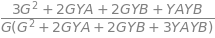

In [151]:
Z=Y14.det()/Y4.det()
simplify(Z)

In [152]:
simplify(Z.subs(YA*YB,G*G))

Zin=R

Otra forma de ver el circuito, es como un puente, en las condiciones donde le producto de las ramas cruzadas es igual, el puente está compenzado por lo tanto no hay circuilación de corriente por el elemento cruzando las ramas, lo que significa que el potencial es el mismo, con esta premisa podemos quitar el elemento, y calcular la tensión como un divisor de tensión.

<img src="./nodos.png" align="center" width="400" /> 

Cuya transferencia de tensión pueden ser calculadas de la misma forma que lo que obtuvimos anteriormente:

$\frac{V_o}{V_i}=\frac{G}{G+YB}$

o

$\frac{V_o}{V_i}=\frac{YA}{G+YA}$

### Ejercicio 6




Obtenga un circuito lattice equivalente al siguiente cuadripolo. Utilice la constante del girador $K=\sqrt2$


<img src="./ej6.png" align="center" width="400" /> 

Por interconexión de cuadripolos veamos a que representa los giradores con el tanque serie LC


In [153]:
import math 
S = symbols('S')

In [154]:
Gir=Matrix([[0,1/sqrt(2)], [sqrt(2),0]])
Gir

⎡    √2⎤
⎢0   ──⎥
⎢    2 ⎥
⎢      ⎥
⎣√2  0 ⎦

In [155]:
Zs=Matrix([[1,(2*S)/(S*S+1)], [0,1]])
Zs

⎡    2⋅S  ⎤
⎢1  ──────⎥
⎢    2    ⎥
⎢   S  + 1⎥
⎢         ⎥
⎣0    1   ⎦

In [156]:
Tt=Gir*Zs*Gir
simplify(Tt)

⎡  1     0⎤
⎢         ⎥
⎢ 4⋅S     ⎥
⎢──────  1⎥
⎢ 2       ⎥
⎣S  + 1   ⎦

El girador y la impedancia central compuesta por el tanque paralelo, terminan conformando una admitancia en derivación de valor $Y=\frac{4S}{S^2+1}$

El valor de ZA del lattice corresponde con el del capacitor en serie tanto a la entrada como a la salida. 
Queda a determinar el valor de ZB del lattice. Dividimos por dos la admitancia para obtener la bisecciòn del circuito 

<img src="./transformado.png" align="center" width="400" /> 

Para llevarlo a Lattice 
<img src="./alattice.png" align="center" width="400" /> 


In [157]:
ZB=2/Tt[2]+2/S
expand(ZB)

<img src="./final.png" align="center" width="400" /> 
